**NOTE THIS WAS DONE FOR TESTING PURPOSE**

And most of it was from online source , thus using it as guideline including the LLM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
file_path = '/content/students_adaptability_level.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,ID,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,1,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,2,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,3,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,4,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,5,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
df_encoded = df.copy()

In [ ]:
# Columns to label encode
label_encode_columns = ['Gender', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Self Lms', 'Device', 'Adaptivity Level']
for col in label_encode_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

In [ ]:
# One-hot encode remaining categorical variables
df_encoded = pd.get_dummies(df_encoded, columns=['Age', 'Education Level', 'Institution Type', 'Class Duration'])


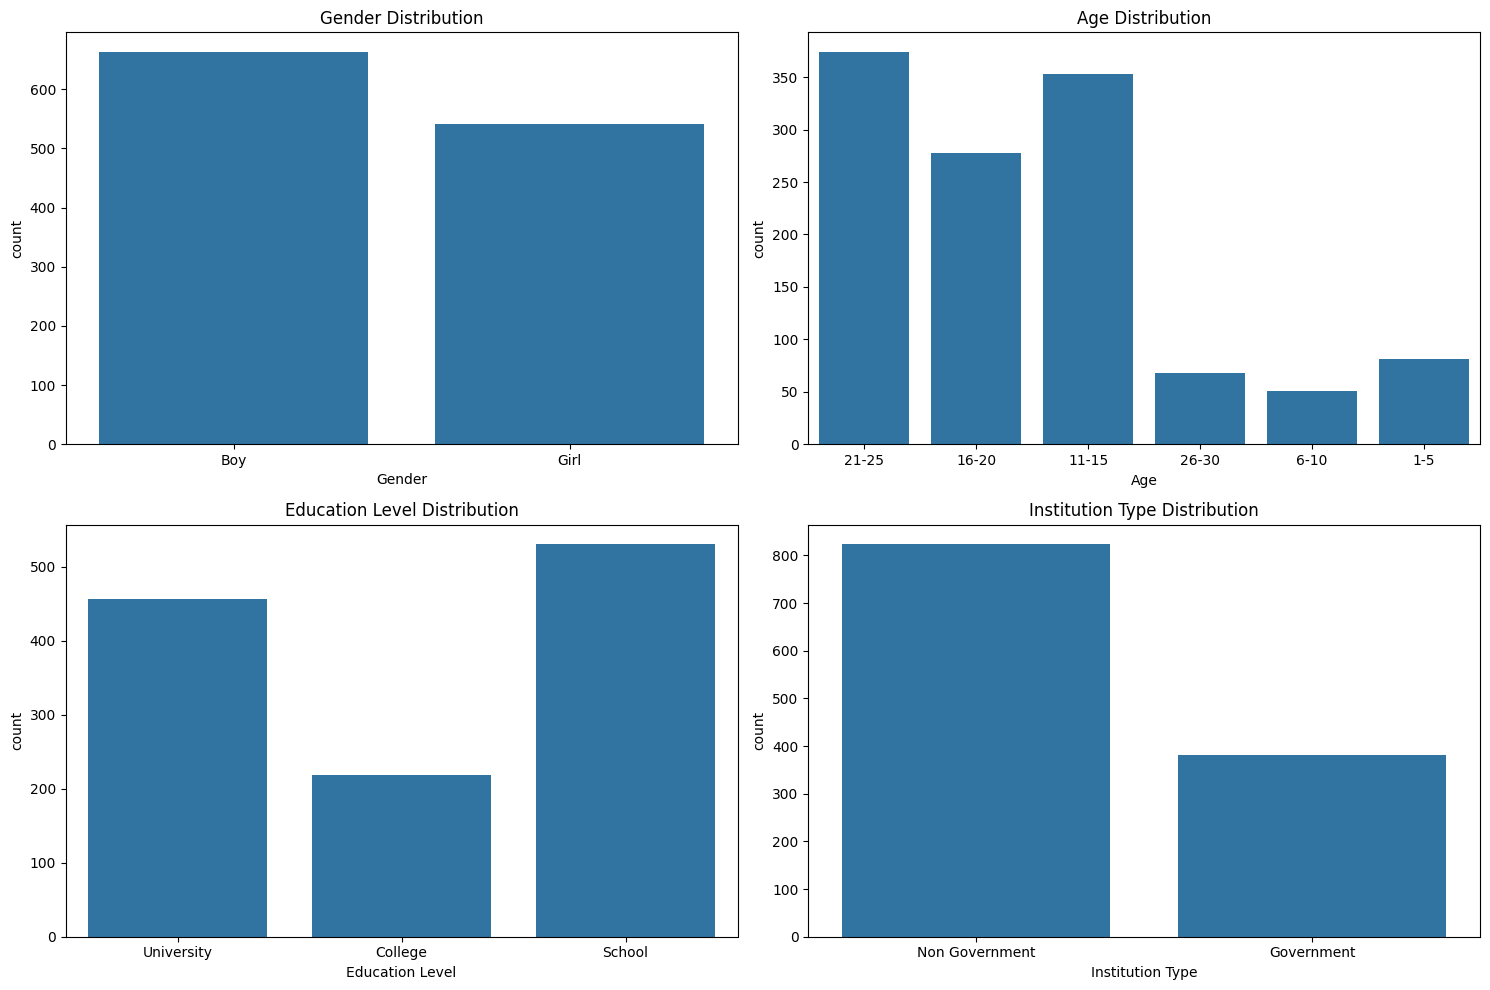

In [ ]:
# Visualizations
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Gender distribution
sns.countplot(x='Gender', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Gender Distribution')

# Age distribution
sns.countplot(x='Age', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Age Distribution')

# Education Level distribution
sns.countplot(x='Education Level', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Education Level Distribution')

# Institution Type distribution
sns.countplot(x='Institution Type', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Institution Type Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# Define the features and target
X = df_encoded.drop('Adaptivity Level', axis=1)
y = df_encoded['Adaptivity Level']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**DECISION TREE**

In [ ]:
# Initialize and train the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = decision_tree.predict(X_test)

In [ ]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.8132780082987552
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        23
           1       0.85      0.79      0.82       103
           2       0.80      0.87      0.83       115

    accuracy                           0.81       241
   macro avg       0.79      0.77      0.78       241
weighted avg       0.81      0.81      0.81       241



**Implementing Linear Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
file_path = '/content/students_adaptability_level.csv'
data = pd.read_csv(file_path)


In [ ]:
# Encode categorical variables
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Split the data into features and target
X = data.drop('Adaptivity Level', axis=1)
y = data['Adaptivity Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Mean Squared Error (Linear Regression): {mse_lr}')


Mean Squared Error (Linear Regression): 0.3262358135561568


In [ ]:
# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy (Naive Bayes): {accuracy_nb}')


Accuracy (Naive Bayes): 0.6763485477178424


In [ ]:
# K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy (K-Nearest Neighbors): {accuracy_knn}')


Accuracy (K-Nearest Neighbors): 0.43568464730290457


**Logistic Regression**

In [ ]:
# Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy (Logistic Regression): {accuracy_logreg}')


Accuracy (Logistic Regression): 0.7012448132780082


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Checking how each model work,  logistic, KNN, linear**

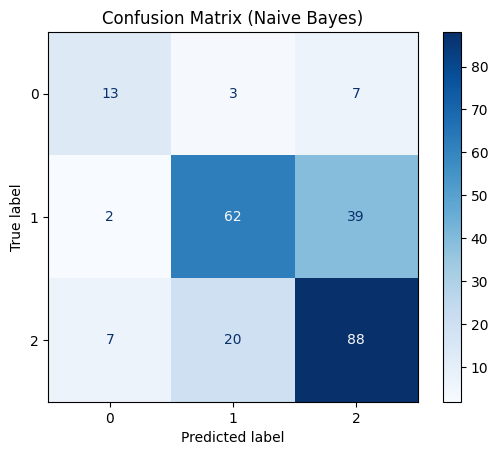

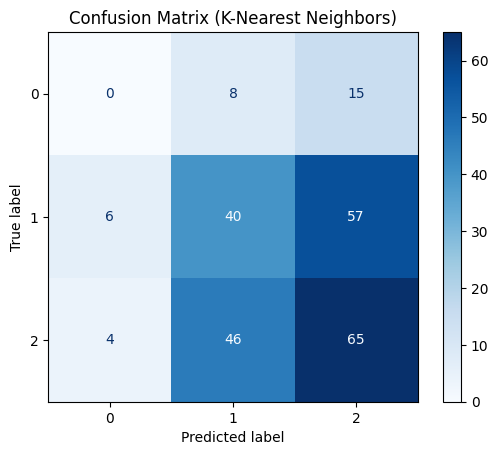

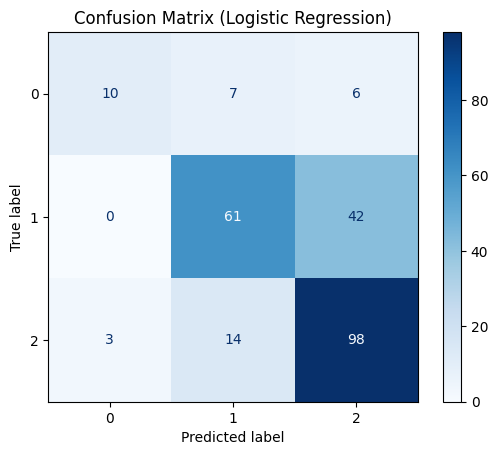

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_nb, 'Confusion Matrix (Naive Bayes)')
plot_confusion_matrix(y_test, y_pred_knn, 'Confusion Matrix (K-Nearest Neighbors)')
plot_confusion_matrix(y_test, y_pred_logreg, 'Confusion Matrix (Logistic Regression)')


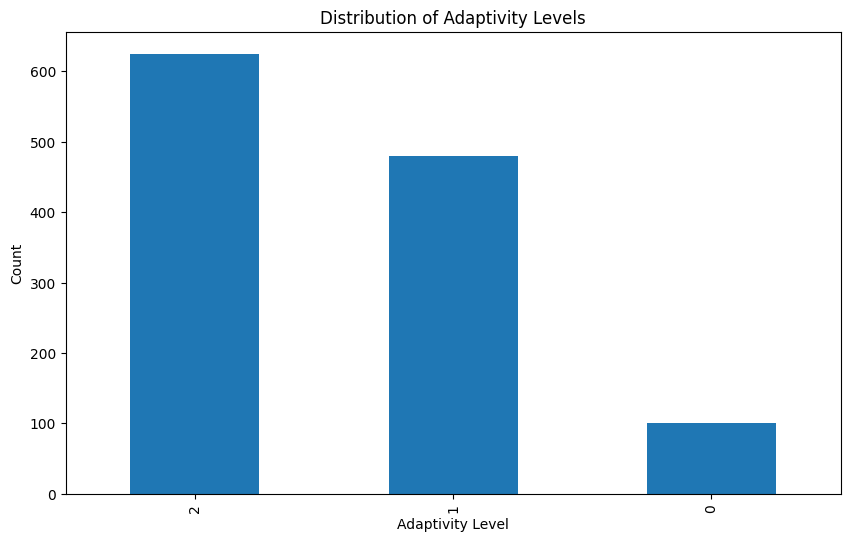

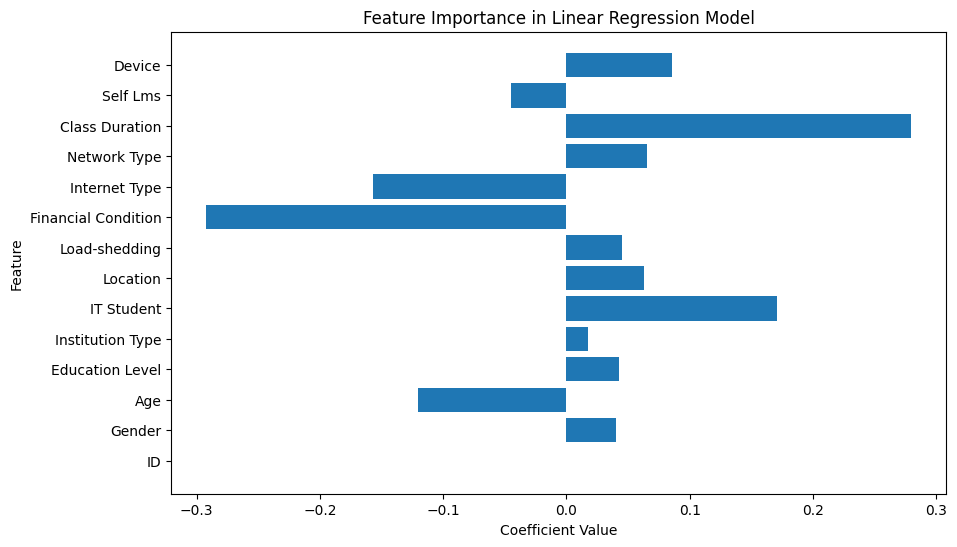

In [ ]:
# Bar chart for distribution of Adaptivity Levels in the dataset
adaptivity_counts = data['Adaptivity Level'].value_counts()
plt.figure(figsize=(10, 6))
adaptivity_counts.plot(kind='bar')
plt.title('Distribution of Adaptivity Levels')
plt.xlabel('Adaptivity Level')
plt.ylabel('Count')
plt.show()

# Bar chart for feature importance in Linear Regression model
importance = lr_model.coef_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importance)
plt.title('Feature Importance in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()
